In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import glob
import re

In [12]:
videos = set()

for file in glob.glob(r'raw/*.csv'):
    n, l, deg = re.match(r'raw/(\d+)_(\d\d)cm_(\d\d)deg', file).groups()
    videos.add(n)
    
print(videos)

{'1637', '1630', '1638', '1639', '1626', '1625', '1629', '1627', '1631'}


In [28]:
def process_tracker_file(filename):
    ''' Return a DataFrame with proper columns given tracker *.csv file. '''
    
    df = pd.read_csv(filename, header=1)
    df = df.drop(columns=['v_{x}', 'v_{y}', 'a_{x}', 'a_{y}'])
    
    return df

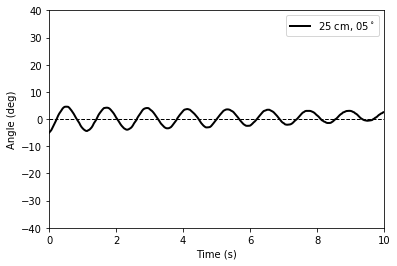

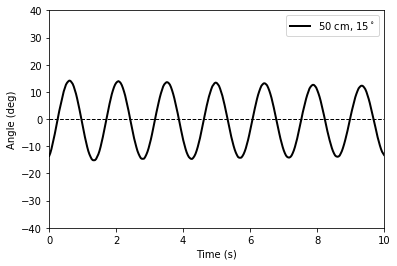

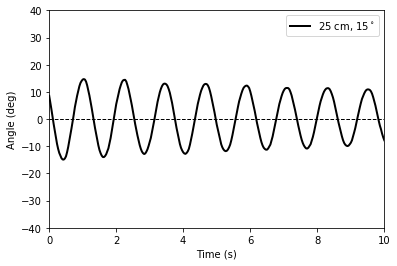

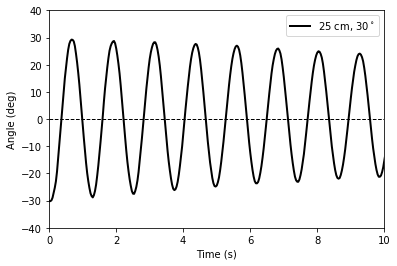

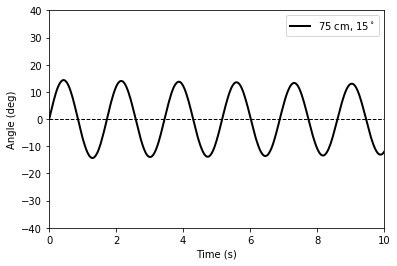

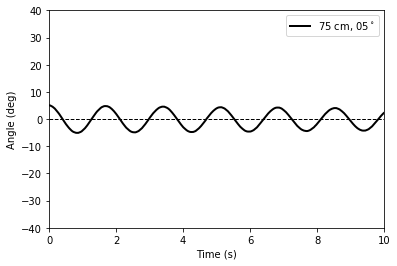

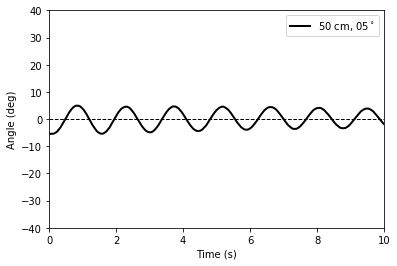

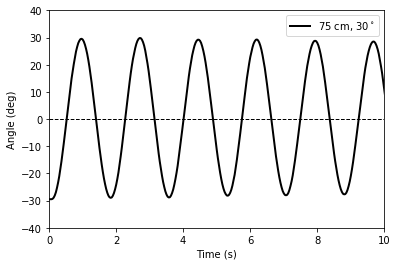

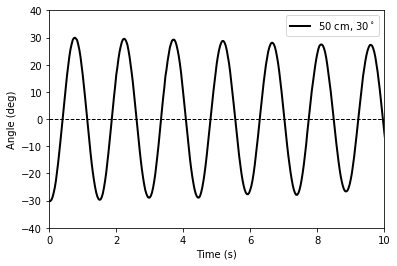

In [61]:
for video in videos:  
    files = glob.glob('raw/*' + video + '*.csv')
    pendulum_file, pivot_file = files
    
    pendulum_df = process_tracker_file(pendulum_file)
    pivot_df    = process_tracker_file(pivot_file)
    
    n, l, deg = re.match(r'raw/(\d+)_(\d\d)cm_(\d\d)deg', pendulum_file).groups()
    
    df['t']  = pendulum_df['t']
    df['x']  = pendulum_df['x']
    df['y']  = pendulum_df['y']
    df['x0'] = pivot_df['x']
    df['y0'] = pivot_df['y']
    
    df['vx'] = df['x'] - df['x0']
    df['vy'] = df['y'] - df['y0']
    
    df['r']     = np.sqrt(df['vx']*df['vx'] + df['vy']*df['vy'])
    df['theta'] = np.arctan(df['vx'] / df['vy'])
    df['angle'] = df['theta'] * 180 / np.pi
    
    plt.plot(df['t'], df['angle'], 
             label=(l + ' cm, ' + deg + '$^\circ$'), 
             c='k', 
             linewidth=2
            )
    
    plt.axhline(0, c='k', linestyle='--', linewidth=1, zorder=0)
    
    plt.legend()
    
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (deg)')
    
    plt.ylim((-40, 40))
    plt.xlim((0,10))
    
    new_name = 'processed/video_' + video + '_' + str(int(l) * 10) + 'mm_' + deg + 'deg'
    
    plt.savefig(new_name, dpi=300)
    plt.show()
    
    df.to_csv(new_name + '.csv', )